In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import string
import seaborn as sns


In [2]:
from nltk.corpus import stopwords #remove useless words

from sklearn.feature_extraction.text import TfidfVectorizer #help create document-term matrix


In [3]:
#stopwords = list of useless words
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:
data = pd.read_csv("train.csv")
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data.shape

(159571, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


No null values in dataset.

In [7]:
data['comment_text'][0]


"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:
data['comment_text'][1]


"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [9]:
data['comment_text'][3]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

Comments are dirty with '\n', other symbols, numbers and values which are not useful. 

In [10]:
data["toxic"].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [11]:
data.toxic.value_counts(normalize=True) #to calculate percentage

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64

Implies 90% of comments do not fall under the category of 'toxic'.

In [12]:
data_count=data.iloc[:,2:].sum() #to create data= count of each category (from all rows and 3rd column onwards) 

In [13]:
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

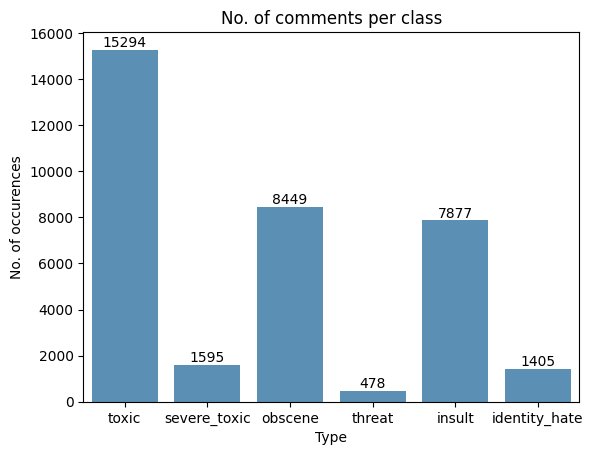

In [14]:
ax= sns.barplot(x=data_count.index, y=data_count.values, alpha=0.8) #alpha = to control transperancy of the bars

plt.title("No. of comments per class")
plt.ylabel("No. of occurences")
plt.xlabel("Type")

#to add labels to each bar
rects= ax.patches
labels= data_count.values
for rect, label in zip(rects,labels):
    height= rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha='center', va='bottom')



In [15]:
num_rows= len(data)
print(num_rows)

159571


In [16]:
sum_tox= (data['toxic'].sum() / num_rows)*100
sum_severe= (data['severe_toxic'].sum() / num_rows)*100
sum_obs= (data['obscene'].sum() / num_rows)*100
sum_thr= (data['threat'].sum() / num_rows)*100
sum_ins= (data['insult'].sum() / num_rows)*100
sum_identity= (data['identity_hate'].sum() / num_rows)*100


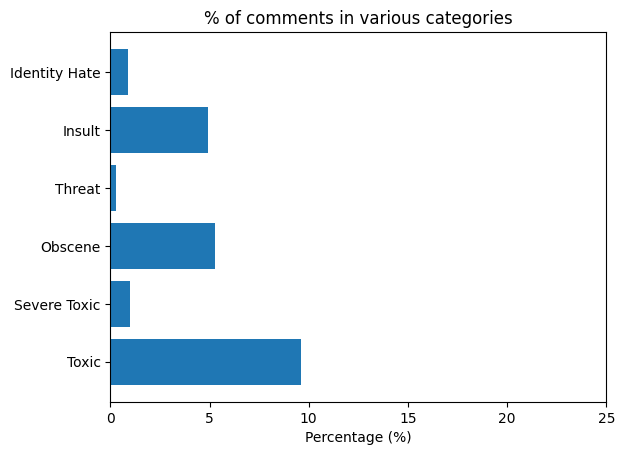

In [17]:
ind=np.arange(6)

category_values = [sum_tox, sum_severe, sum_obs, sum_thr, sum_ins, sum_identity]

ax= plt.barh(ind, category_values)

plt.title('% of comments in various categories')
plt.xlabel('Percentage (%)')
plt.xticks(np.arange(0, 30, 5))
plt.yticks(ind, ('Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate'))

plt.show()

PRE- PROCESSING THE TEXT

In [18]:
# remove all alphanumeric(numbers and letters) sequences
alphanumeric= lambda x: re.sub('\w*\d\w*',' ', x)

# replace punctuation with space
# convert all strings to lowercase 
punc_lower= lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# replace '\n' with space
remove_n= lambda x: re.sub("\n"," ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

data['comment_text']= data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [19]:
data_tox = data.loc[:,['id','comment_text','toxic']]
data_sev = data.loc[:,['id','comment_text','severe_toxic']]
data_obs = data.loc[:,['id','comment_text','obscene']]
data_thr = data.loc[:,['id','comment_text','threat']]
data_ins = data.loc[:,['id','comment_text','insult']]
data_ideh = data.loc[:,['id','comment_text','identity_hate']]

WORDCLOUD

In [20]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [21]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

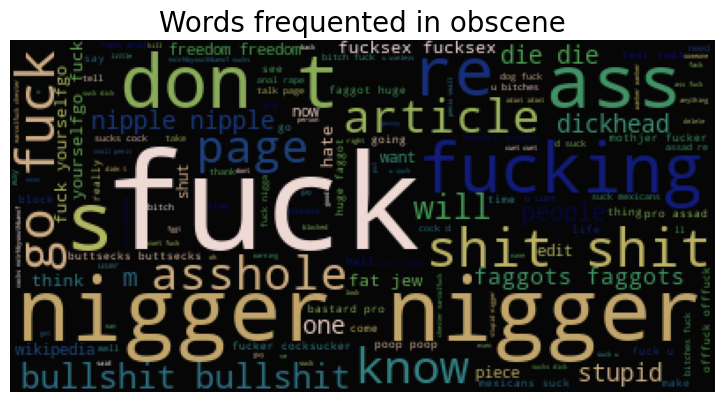

In [22]:
wordcloud(data_obs, 'obscene')

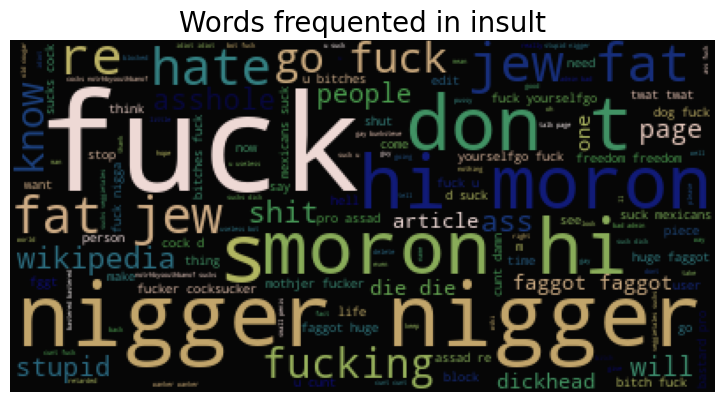

In [23]:
wordcloud(data_ins, 'insult')

Earlier we saw that <10% of comments were toxic. Therefore, the dataset is imbalanced.

Toxic : Non-Toxic = 20% (ideally 50%)

This ratio can be achieved in a subset of data......

In [24]:
data_tox[data_tox['toxic'] == 1].count()

id              15294
comment_text    15294
toxic           15294
dtype: int64

In [25]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]

In [26]:
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]

In [27]:
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(10000, 3)

Not all categories have 5000 rows

In [28]:
data_sev[data_sev['severe_toxic'] == 1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [29]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[0:1595,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:1595,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3190, 3)

In [30]:
data_obs[data_obs['obscene'] == 1].count()

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [31]:
data_obs_1 = data_obs[data_obs['obscene'] == 1].iloc[0:5000,:]
data_obs_0 = data_obs[data_obs['obscene'] == 0].iloc[0:5000,:]
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(10000, 3)

In [32]:
data_thr[data_thr['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [33]:
data_thr_1 = data_thr[data_thr['threat'] == 1].iloc[0:478,:]

# if only 478 + 478 was taken it would be miniscule
# Therefore included 1912 comments that have no threat so that the data with threat (478) will represent 20% of the dataset.
data_thr_0 = data_thr[data_thr['threat'] == 0].iloc[0:1912,:]  
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2390, 3)

In [34]:
data_ins[data_ins['insult'] == 1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [35]:
data_ins_1 = data_ins[data_ins['insult'] == 1].iloc[0:5000,:]
data_ins_0 = data_ins[data_ins['insult'] == 0].iloc[0:5000,:]
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(10000, 3)

In [36]:
data_ideh[data_ideh['identity_hate'] == 1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [37]:
data_ideh_1 = data_ideh[data_ideh['identity_hate'] == 1].iloc[0:1405,:] # 20%
data_ideh_0 = data_ideh[data_ideh['identity_hate'] == 0].iloc[0:5620,:] # 80%
data_ideh_done = pd.concat([data_ideh_1, data_ideh_0], axis=0)
data_ideh_done.shape

(7025, 3)

|      Category        | DF name       | No. of pts (1) | No. of pts (0) | Total data pts |
|----------------------|---------------|----------------|----------------|----------------|
| Toxic (14,000+)               | data_tox_done | 5000           | 5000           | 10000          |
| Severe Toxic (1595)        | data_sev_done | 1595           | 1595           | 3190           |
| Obscene (8449)       | data_obs_done | 5000           | 5000           | 10000          |
| Threat (478)         | data_thr_done | 478            | 1912           | 2390           |
| Insult (7877)        | data_ins_done | 5000           | 5000           | 10000          |
| Identity Hate (1405) | data_ide_done | 1405           | 5620           | 7025           |

MODEL TRAINING AND EVALUATION

In [40]:
# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [50]:
def cv_tf_train_test(df_done, label, vectorizer, ngram):

    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Initialize and fit models
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)
    print('knn done')

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    svm_model = LinearSVC(dual=True)
    svm_model.fit(X_train_cv1, y_train)
    print('svc done')

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Add XGBoost model
    xgb_model = XGBClassifier(eval_metric='mlogloss')
    xgb_model.fit(X_train_cv1, y_train)
    print('xgboost done')
    
    # Create a list of F1 scores of all models 
    f1_score_data = {'F1 Score': [f1_score(lr.predict(X_test_cv1), y_test), 
                                  f1_score(knn.predict(X_test_cv1), y_test), 
                                  f1_score(bnb.predict(X_test_cv1), y_test), 
                                  f1_score(svm_model.predict(X_test_cv1), y_test), 
                                  f1_score(randomforest.predict(X_test_cv1), y_test), 
                                  f1_score(xgb_model.predict(X_test_cv1), y_test)]} 
    
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression', 'KNN', 'BernoulliNB', 'SVM', 'Random Forest', 'XGBoost'])  

    return df_f1


In [51]:
import time

t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

lr done
knn done
bnb done
svc done
rdf done
xgboost done
Time taken: 46.277339696884155 seconds


,F1 Score(toxic)
Log Regression,0.861234
KNN,0.136473
BernoulliNB,0.776521
SVM,0.876133
Random Forest,0.838055
XGBoost,0.842480


In [52]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

lr done
knn done
bnb done
svc done
rdf done
xgboost done
Time taken: 8.504032611846924 seconds


,F1 Score(severe_toxic)
Log Regression,0.927879
KNN,0.856046
BernoulliNB,0.803707
SVM,0.926004
Random Forest,0.934874
XGBoost,0.921081


In [55]:
t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_obs_cv

lr done
knn done
bnb done
svc done
rdf done
xgboost done
Time taken: 44.30082392692566 seconds


,F1 Score(obscene)
Log Regression,0.908655
KNN,0.215029
BernoulliNB,0.787830
SVM,0.921378
Random Forest,0.909091
XGBoost,0.920765


In [53]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

lr done
knn done
bnb done
svc done
rdf done
xgboost done
Time taken: 5.940018892288208 seconds


,F1 Score(threat)
Log Regression,0.628821
KNN,0.720000
BernoulliNB,0.311828
SVM,0.786765
Random Forest,0.795539
XGBoost,0.772414


In [56]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ins_cv

lr done
knn done
bnb done
svc done
rdf done
xgboost done
Time taken: 44.01295828819275 seconds


,F1 Score(insult)
Log Regression,0.896599
KNN,0.207898
BernoulliNB,0.783762
SVM,0.902619
Random Forest,0.883993
XGBoost,0.895940


In [54]:
t0 = time.time()

df_ideh_cv = cv_tf_train_test(data_ideh_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ideh_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ideh_cv

lr done
knn done
bnb done
svc done
rdf done
xgboost done
Time taken: 25.56195068359375 seconds


,F1 Score(identity_hate)
Log Regression,0.699029
KNN,0.161826
BernoulliNB,0.549206
SVM,0.797516
Random Forest,0.768448
XGBoost,0.765957


In [58]:
# A master dataframe to compare F1 scores across all categories.
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ideh_cv], axis=1)
f1_all

,F1 Score(toxic),F1 Score(severe_toxic),F1 Score(obscene),F1 Score(insult),F1 Score(threat),F1 Score(identity_hate)
Log Regression,0.861234,0.927879,0.908655,0.896599,0.628821,0.699029
KNN,0.136473,0.856046,0.215029,0.207898,0.720000,0.161826
BernoulliNB,0.776521,0.803707,0.787830,0.783762,0.311828,0.549206
SVM,0.876133,0.926004,0.921378,0.902619,0.786765,0.797516
Random Forest,0.838055,0.934874,0.909091,0.883993,0.795539,0.768448
XGBoost,0.842480,0.921081,0.920765,0.895940,0.772414,0.765957


In [59]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,SVM,Random Forest,XGBoost
F1 Score(toxic),0.861234,0.136473,0.776521,0.876133,0.838055,0.842480
F1 Score(severe_toxic),0.927879,0.856046,0.803707,0.926004,0.934874,0.921081
F1 Score(obscene),0.908655,0.215029,0.787830,0.921378,0.909091,0.920765
F1 Score(insult),0.896599,0.207898,0.783762,0.902619,0.883993,0.895940
F1 Score(threat),0.628821,0.720000,0.311828,0.786765,0.795539,0.772414
F1 Score(identity_hate),0.699029,0.161826,0.549206,0.797516,0.768448,0.765957


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

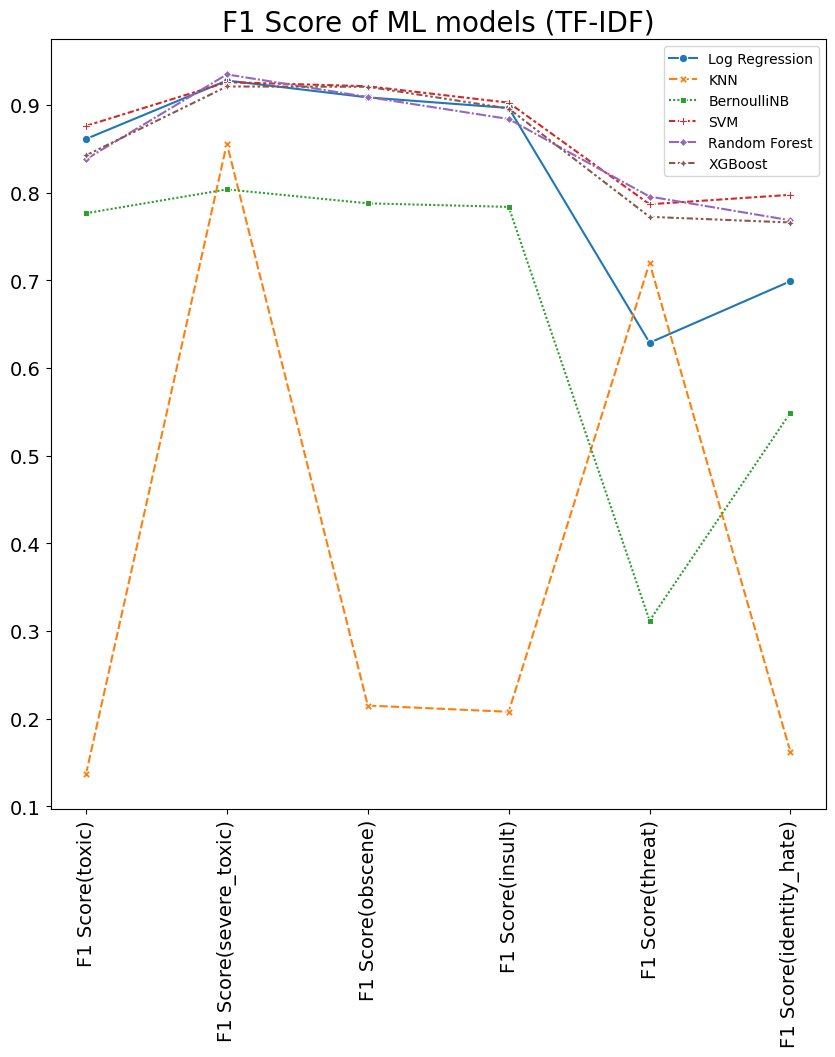

In [60]:
plt.figure(figsize=(10,10))
sns.lineplot(data=f1_all_trp, markers=True)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=20)

In [61]:
X = data_tox_done.comment_text
y = data_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
comment1 = ['You are dumb']
comment2 = ['Why are you eating an apple']

In [65]:
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.98089286])

In [66]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.30149129])

PICKLING FOR ALL CATEGORIES

In [ ]:
import pickle

In [ ]:
def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]

    # Initiate a Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # Convert the X data into a document term matrix dataframe
    X_vect = tfv.fit_transform(X)  
    
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)

    # Create a new pickle file based on random forest
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(randomforest, f)

In [ ]:
datalist = [data_tox_done, data_sev_done, data_obs_done, data_ins_done, data_thr_done, data_ideh_done]
label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

for i,j in zip(datalist,label):
    pickle_model(i, j)